# Plotting temperature maps under Python

This snippet applies the basemap package plotting 

In [1]:
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

matplotlib.rcParams['figure.figsize'] = (30.0, 10.0)

In [2]:
nc_file = "/media/desplein/store/projetoMeteo/old/nc/air_mon_mean.nc"
nc_fid = Dataset(nc_file, 'r') 
                             
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
air = nc_fid.variables['air'][:]

In [29]:
# Python and the renalaysis are slightly off in time so this fixes that problem
offset = dt.timedelta(hours=48)
# List of all times in the file as datetime objects
dt_time = [dt.date(1800, 1, 1) + dt.timedelta(hours=t) for t in time]

air_mean = np.mean(air[:, :, :], axis=0 )

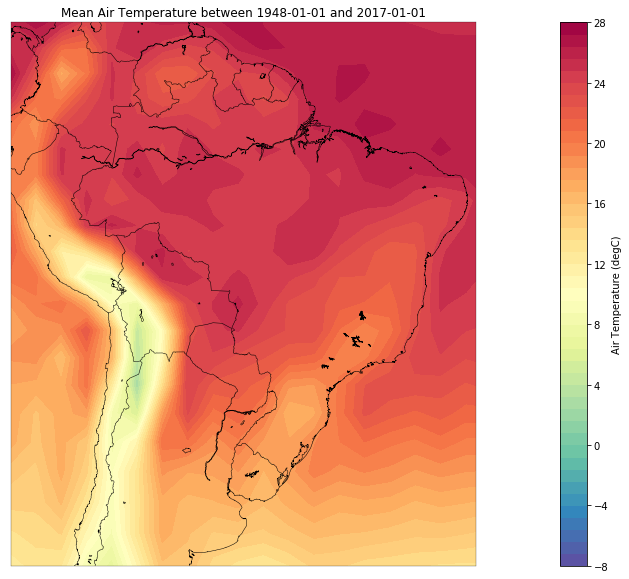

In [68]:
# Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# for other projections.
#m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
#            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m = Basemap(projection='merc',llcrnrlon=280.,llcrnrlat=-40.,urcrnrlon=326.,urcrnrlat=10.,resolution='i')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawmapboundary(linewidth=0.25)

# Make the plot continuous
air_cyclic, lons_cyclic = addcyclic(air_mean, lons)

# Create 2D lat/lon arrays for Basemap
lon2d, lat2d = np.meshgrid(lons_cyclic, lats)

# Transforms lat/lon into plotting coordinates for projection
x, y = m(lon2d, lat2d)

# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, air_cyclic, 45, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label("%s (%s)" % (nc_fid.variables['air'].var_desc,nc_fid.variables['air'].units))

plt.title("Mean %s between %s and %s" % (nc_fid.variables['air'].var_desc, dt_time[0], dt_time[len(dt_time)-1]))
plt.show()